In [1]:
import os
import sys

path = os.getcwd()
while os.path.basename(os.path.normpath(path)) != 'roman-pandeia':
    path = os.path.dirname(path)
repo_path = path
if repo_path not in sys.path:
    sys.path.append(repo_path)

In [2]:
import numpy as np
import time

from pprint import pprint
from tqdm import tqdm
import matplotlib.pyplot as plt
from pandeia.engine.perform_calculation import perform_calculation
from pandeia.engine.calc_utils import build_default_calc, build_default_source
from lenstronomy.Util import data_util
from lenstronomy.SimulationAPI.ObservationConfig.Roman import Roman

from package.helpers import test_physical_lens
from package.pandeia import pandeia_input
from package.plots import diagnostic_plot, plot

plt.style.use(f'{repo_path}/package/mplstyle/science.mplstyle')

In [3]:
csv = os.path.join(repo_path, 'data', 'roman_spacecraft_and_instrument_parameters.csv')
figure_dir = os.path.join(repo_path, 'figures')
array_dir = os.path.join(repo_path, 'output', 'arrays', 'no_noise_or_background')

In [4]:
grid_oversample = 11

lens = test_physical_lens.TestPhysicalLens()
model = lens.get_array(num_pix=45 * grid_oversample)

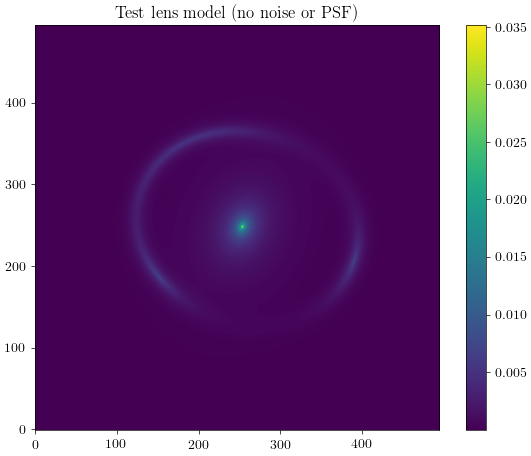

In [5]:
plot.plot(array=model,
          colorbar=True,
          title='Test lens model (no noise or PSF)')

In [7]:
num_samples = 100000

# build Pandeia input
calc, num_point_sources = pandeia_input.build_pandeia_calc(csv=csv,
                                        array=model, 
                                        lens=lens, 
                                        band='f106', 
                                        num_samples=num_samples)

  0%|          | 0/495 [00:00<?, ?it/s]/data/bwedig/.conda/envs/pandeia/lib/python3.9/site-packages/lenstronomy/Util/data_util.py:67: RuntimeWarning: divide by zero encountered in log10
  delta_m = -np.log10(cps) * 2.5
100%|██████████| 49728/49728 [05:32<00:00, 149.60it/s]

Point source conversion complete: placed 49728 point sources


In [8]:
# turn background off. options include 'none', 'minzodi' (default), and 'ecliptic'
calc['background'] = 'none'

# turn all noise and effects off
calculation_dict = pandeia_input.get_calculation_dict(init=False)
calc['calculation'] = calculation_dict

In [9]:
# do Pandeia calculation        
detector, execution_time = pandeia_input.get_pandeia_image(calc)
print(f'Execution time: {execution_time}')

np.save(os.path.join(array_dir, f'detector_no_noise_or_background_{grid_oversample}_{num_samples}'), detector)

Performing Pandeia calculation...


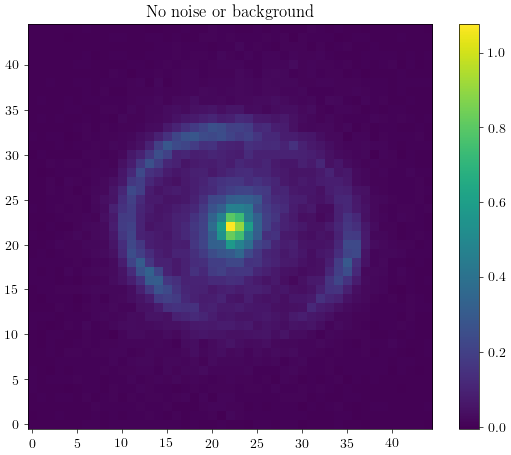

In [ ]:
plot.plot(array=detector,
          colorbar=True,
          title='No noise or background')